In [31]:
import os
os.chdir("/home/robbe/ionbot/")
import OxiAnalysis as OA
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [32]:
matrix = pd.read_csv("/home/robbe/ionbot/Clustering/Matrix_annot.csv", sep=";", decimal=",", index_col="Sample_ID")

In [33]:
matrix = matrix.fillna(0)

In [34]:
matrix.reset_index(inplace=True)
matrix["Sample_ID"] = matrix["Sample_ID"].apply(lambda x: x[10:])
matrix.set_index("Sample_ID", inplace=True)

In [35]:
matrix

,Project,Condition,[1384]Homocysteic_acid[M],[1914]Met->AspSA[M],[1915]Decarboxylation[D],[1915]Decarboxylation[E],[1916]Aspartylurea[H],[1917]Formylasparagine[H],[1918]Carbonyl[A],[1918]Carbonyl[E],...,[340]Bromo[Y],[425]Dioxidation[C],[53]HNE[H],[53]HNE[K],[720]HNE-Delta:H(2)O[H],[720]HNE-Delta:H(2)O[K],[721]4-ONE[H],[721]4-ONE[K],[743]4-ONE+Delta:H(-2)O(-1)[H],[860]G-H1[R]
Sample_ID,,,,,,,,,,,,,,,,,,,,,
150828_PC_VUR_C1077,PXD010469,Young,0.000066,0.000178,0.000000,0.000084,0.000104,0.000088,0.000000,0.000000,...,0.0,0.0,0.000173,0.000086,0.0,0.0,0.0,0.0,0.000000,0.0
150828_PC_VUR_C1093,PXD010469,Young,0.000088,0.000273,0.000000,0.000198,0.000000,0.000490,0.000054,0.000000,...,0.0,0.0,0.000096,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0
150828_PC_VUR_C1133,PXD010469,Young,0.000062,0.000062,0.000000,0.000069,0.000067,0.000242,0.000171,0.000087,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0
150828_PC_VUR_C1134,PXD010469,Young,0.000071,0.000165,0.000000,0.000073,0.000070,0.000104,0.000068,0.000096,...,0.0,0.0,0.000067,0.000082,0.0,0.0,0.0,0.0,0.000000,0.0
150828_PC_VUR_C1138,PXD010469,Young,0.000066,0.000123,0.000059,0.000063,0.000000,0.000373,0.000045,0.000078,...,0.0,0.0,0.000000,0.000115,0.0,0.0,0.0,0.0,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
QX01870,PXD014381,RA_Control,0.000000,0.000148,0.000044,0.000121,0.000000,0.000037,0.000087,0.000131,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0
QX01872,PXD014381,RA_Treatment,0.000000,0.000034,0.000074,0.000162,0.000000,0.000000,0.000092,0.000184,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000034,0.0
QX01873,PXD014381,RA_Control,0.000000,0.000000,0.000045,0.000143,0.000000,0.000038,0.000095,0.000150,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0


In [36]:
Project = matrix["Project"]
Condition = matrix["Condition"]
matrix.drop(columns=["Condition", "Project"], inplace=True)

In [37]:
import numpy as np
matrix = np.log(matrix)

/home/robbe/.local/lib/python3.9/site-packages/pandas/core/internals/blocks.py:402: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)


In [38]:
matrix.replace(-np.inf, 0, inplace=True)

In [49]:
lut = dict(zip(Condition.unique(), sns.hls_palette(len(Condition.unique()))))
row_colors = Condition.map(lut)
lut2 = dict(zip(Project.unique(), sns.hls_palette(len(Condition.unique()))))
row_colors2 = Project.map(lut2)

<Figure size 720x720 with 0 Axes>

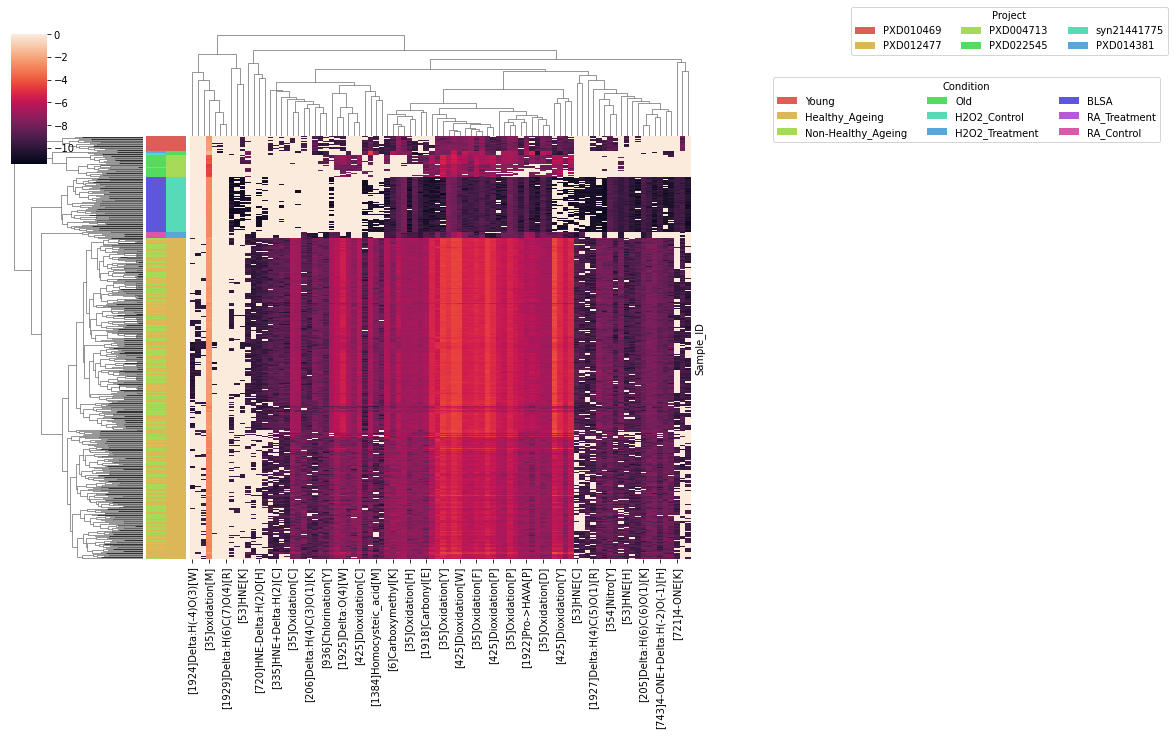

In [96]:
fig = plt.figure()
ax = sns.clustermap(data=matrix, mask=matrix.isna(), row_colors=[row_colors, row_colors2], yticklabels=False, method="complete")
for label in Condition.unique():
    ax.ax_col_dendrogram.bar(0, 0, color=lut[label],
                            label=label, linewidth=0)
l1 = ax.ax_col_dendrogram.legend(loc='center', bbox_to_anchor=(1.3, 0., 0.5, 0.5), ncol=3, title="Condition")
for label in Project.unique():
    ax.ax_row_dendrogram.bar(0, 0, color=lut2[label],
                            label=label, linewidth=0)
l2 = ax.ax_row_dendrogram.legend(loc='center', bbox_to_anchor=(7, 1, 0.8, 0.5), ncol=3, title="Project")
fig.set_size_inches(10,10)